# Email Spam Detection

In this project we used text classification to determined whether the email is spam or not. 
We used NLP methods to prepare and clean our text data (tokenization, remove stop words, stemming) and different machine learning algorithms to get more accurate predictions. 
The following classification algorithms have been used: Logistic Regression, 
    Naive Bayes, 
    Support Vector Machine (SVM),
    Random Forest, 
    Stochastic Gradient Descent and Gradient Boosting.

1. PIP instal imblearn
2. Loading Required libaries and data
3. Exploratory Data Analysis
4. Data Pre-processing
5. Vectorization
6. SMOTE
7. Model building
8. Accuracy of different model 
9. joblib to save
10. Conclusion

In [1]:
!pip install imblearn

## Loading Required libaries and data

In [2]:
import re
import nltk
nltk.download()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import joblib
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [3]:
# getting csv formate data

data=pd.read_csv('messages.csv')
data

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0
...,...,...,...
2888,love your profile - ysuolvpv,hello thanks for stopping by ! ! we have taken...,1
2889,you have been asked to join kiddin,"the list owner of : "" kiddin "" has invited you...",1
2890,anglicization of composers ' names,"judging from the return post , i must have sou...",0
2891,"re : 6 . 797 , comparative method : n - ary co...",gotcha ! there are two separate fallacies in t...,0


In [4]:
# getting the unique values in a column, total number of unique values in a column

data.nunique()

subject    2613
message    2859
label         2
dtype: int64

In [5]:
# finding null values, each column gives out total number of null values of that column

data.isnull().sum()

subject    62
message     0
label       0
dtype: int64

In [6]:
# getting information about each column which gives null value, count and data type

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2893 entries, 0 to 2892
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  2831 non-null   object
 1   message  2893 non-null   object
 2   label    2893 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 67.9+ KB


In [7]:
# message review

data['message'][0]

"content - length : 3386 apple-iss research center a us $ 10 million joint venture between apple computer inc . and the institute of systems science of the national university of singapore , located in singapore , is looking for : a senior speech scientist - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise in computational linguistics , including natural language processing and * * english * * and * * chinese * * statistical language modeling . knowledge of state-of - the-art corpus-based n - gram language models , cache language models , and part-of - speech language models are required . a text - to - speech project leader - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - the successful candidate will have research expertise expertise in two or more of the following areas : computational linguistics , including natural language parsing , lexical database design , and statistical language modeling ; text tokenization and

In [8]:
#used to view some basic statistical details like percentile, mean, std and so on

data.describe()

,label
count,2893.000000
mean,0.166263
std,0.372381
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Exploratory Data Analysis

0    83.373661
1    16.626339
Name: label, dtype: float64


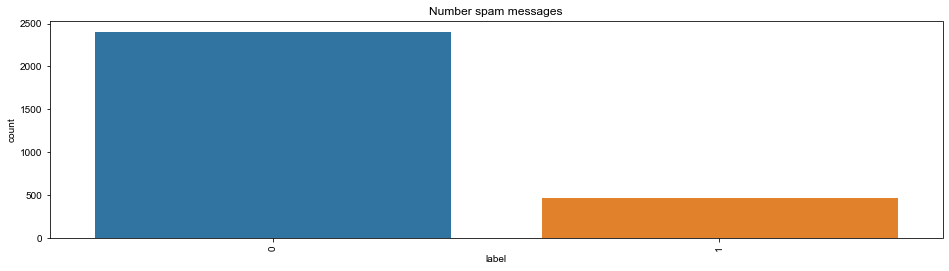

In [9]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
sb.set_style('dark')
print(data['label'].value_counts()/len(data)*100)
sb.countplot(x='label',data=data)
plt.xlabel('label')
plt.title('Number spam messages');

### Representing of spam with pie chart

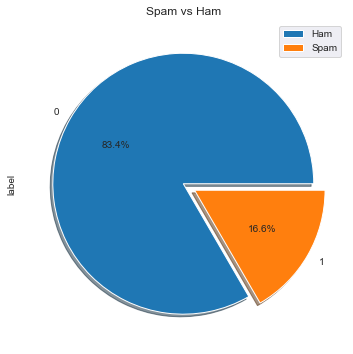

In [10]:
data["label"].value_counts().plot(kind = 'pie',
                                  explode=[0, 0.1],
                                  figsize=(6, 6),
                                  autopct='%1.1f%%',
                                  shadow=True)
plt.title("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

Through the above pie chart we can get the percentage of spam and ham 

### Visual representation of message length

In [11]:
# Length of each mail 

data['length'] = data.message.apply(len)
data.head(10)

,subject,message,label,length
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0,2856
1,NaN,"lang classification grimes , joseph e . and ba...",0,1800
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0,1435
3,risk,a colleague and i are researching the differin...,0,324
4,request book information,earlier this morning i was on the phone with a...,0,1046
5,call for abstracts : optimality in syntactic t...,content - length : 4437 call for papers is the...,0,4492
6,m . a . in scandinavian linguistics,m . a . in scandinavian linguistics at the uni...,0,2201
7,call for papers : linguistics session of the m...,call for papers linguistics session - - midwes...,0,802
8,foreign language in commercials,content - length : 1937 greetings ! i ' m wond...,0,1230
9,fulbright announcement : please post / dissemi...,fulbright announcement : please post / dissemi...,0,1478


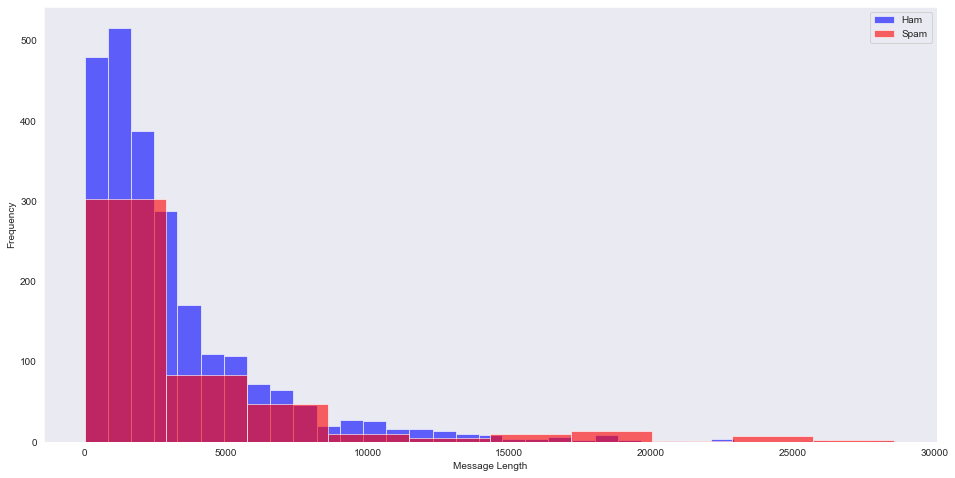

In [12]:
plt.figure(figsize=(16,8))
sb.set_style('dark')
data[data.label == 0].length.plot(bins=35, kind='hist', color='blue', label='Ham', alpha=0.6)
data[data.label == 1].length.plot(kind='hist', color='red', label='Spam', alpha=0.6)
plt.legend()
plt.xlabel("Message Length");

## Data Pre-processing

In [13]:
# removing column which is not useful for us

data.drop(['subject'], axis=1, inplace=True)
data

,message,label,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046
...,...,...,...
2888,hello thanks for stopping by ! ! we have taken...,1,262
2889,"the list owner of : "" kiddin "" has invited you...",1,2163
2890,"judging from the return post , i must have sou...",0,1039
2891,gotcha ! there are two separate fallacies in t...,0,2949


In [14]:
# renaming the columns 

data.rename(columns={'message':'Message','label': 'Class'}, inplace=True)
data.head()

,Message,Class,length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


### Cleaning text process

In [15]:
# The function to clean text

def clean_text(words):
    
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()                   
    return " ".join(text)

data['Message_clean_text'] = data['Message'].apply(clean_text)
data.head()

,Message,Class,length,Message_clean_text
0,content - length : 3386 apple-iss research cen...,0,2856,content length apple iss research center a us ...
1,"lang classification grimes , joseph e . and ba...",0,1800,lang classification grimes joseph e and barbar...
2,i am posting this inquiry for sergei atamas ( ...,0,1435,i am posting this inquiry for sergei atamas sa...
3,a colleague and i are researching the differin...,0,324,a colleague and i are researching the differin...
4,earlier this morning i was on the phone with a...,0,1046,earlier this morning i was on the phone with a...


### Removing stop words

In [16]:
# Getting the stop words

stop_words = stopwords.words('english')
print(stop_words[::10])

# The function to removing stopwords

def remove_stopwords(text):

    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

data['Message_remove_stopwords'] = data['Message_clean_text'].apply(remove_stopwords)
data.head()

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


,Message,Class,length,Message_clean_text,Message_remove_stopwords
0,content - length : 3386 apple-iss research cen...,0,2856,content length apple iss research center a us ...,content length apple iss research center us mi...
1,"lang classification grimes , joseph e . and ba...",0,1800,lang classification grimes joseph e and barbar...,lang classification grimes joseph e barbara f ...
2,i am posting this inquiry for sergei atamas ( ...,0,1435,i am posting this inquiry for sergei atamas sa...,posting inquiry sergei atamas satamas umabnet ...
3,a colleague and i are researching the differin...,0,324,a colleague and i are researching the differin...,colleague researching differing degrees risk p...
4,earlier this morning i was on the phone with a...,0,1046,earlier this morning i was on the phone with a...,earlier morning phone friend mine living south...


### Applying Stemming

In [17]:
porter = PorterStemmer()

# The function to apply stemming

def stemmer(stem_text):

    stem_text = [porter.stem(word) for word in stem_text.split()]
    return " ".join(stem_text)

data['message'] = data['Message_remove_stopwords'].apply(stemmer)
data.head()

,Message,Class,length,Message_clean_text,Message_remove_stopwords,message
0,content - length : 3386 apple-iss research cen...,0,2856,content length apple iss research center a us ...,content length apple iss research center us mi...,content length appl iss research center us mil...
1,"lang classification grimes , joseph e . and ba...",0,1800,lang classification grimes joseph e and barbar...,lang classification grimes joseph e barbara f ...,lang classif grime joseph e barbara f grime et...
2,i am posting this inquiry for sergei atamas ( ...,0,1435,i am posting this inquiry for sergei atamas sa...,posting inquiry sergei atamas satamas umabnet ...,post inquiri sergei atama satama umabnet ab um...
3,a colleague and i are researching the differin...,0,324,a colleague and i are researching the differin...,colleague researching differing degrees risk p...,colleagu research differ degre risk perceiv ho...
4,earlier this morning i was on the phone with a...,0,1046,earlier this morning i was on the phone with a...,earlier morning phone friend mine living south...,earlier morn phone friend mine live south amer...


In [18]:
#total number of words 

print(data['message'].apply(lambda x: len(x.split(' '))).sum())

810324


#### After text cleaning and removing stop words, we have only 810324 words

## Vectorization
To run machine learning algorithms we need to convert text files into numerical feature vectors. 

We will use bag of words model for our analysis.

We spliting the complete data into X as message and y as class values:

In [19]:
X = data['message']
y = data['Class']

In [20]:
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X)

X_vec = vect.transform(X)

len(vect.get_feature_names())

27479

#### We will split the data into a training and a test part. The models will be trained on the training data set and tested on the test data set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state = 0)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2314, 27479)
(579, 27479)
(2314,)
(579,)


### SMOTE

The target class variable is imbalanced, The simplest way to improve imbalanced dataset is balancing them by oversampling instances of the minority class or undersampling instances of the majority class. 

We will try to balancing classes by using one of the advanced techniques like the SMOTE method 

(Synthetic Minority Over-sampling Technique).


SMOTE technique is one of the most commonly used oversampling methods to solve the imbalance problem. 
It goal is to balance class distribution by randomly increasing minority class examples by replicating them.


In [22]:
# We will use imbalanced-learn library to apply SMOTE method

smote = SMOTE()
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [23]:
# shape of training and testing after SMOTE

print(X_train_sm.shape)
print(y_train_sm.shape)

(3876, 27479)
(3876,)


## Model Building

We use the following classification models:

1. Decision tree Classifier
2. Naive Bayes Classifier
3. Random Forest Classifier
4. Gradient Boosting
5. SVM (Support Vector Machine)
6. Stochastic Gradient Descent

#### To make the vectorizer > transformer > classifier easier to work with, we will use Pipeline class in SK-Learn.

## Decision tree Classifier

In [25]:
model_dtc = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',DecisionTreeClassifier()),
                   ])

model_dtc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_0 = model_dtc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_0, y_test))
print(classification_report(ytest, pred_0))

accuracy 0.9602763385146805
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       474
           1       0.85      0.94      0.90       105

    accuracy                           0.96       579
   macro avg       0.92      0.95      0.94       579
weighted avg       0.96      0.96      0.96       579



## Naive Bayes Classifier

In [26]:
model_nbc = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',MultinomialNB()),
                   ])

model_nbc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_1 = model_nbc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_1, y_test))
print(classification_report(ytest, pred_1))

accuracy 0.9965457685664939
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       474
           1       0.99      0.99      0.99       105

    accuracy                           1.00       579
   macro avg       0.99      0.99      0.99       579
weighted avg       1.00      1.00      1.00       579



## Random Forest Classifier

In [27]:
model_rfc = Pipeline([('tfidf', TfidfTransformer()),
                   ('model',RandomForestClassifier(n_estimators=50)),
                   ])

model_rfc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_2 = model_rfc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_2, y_test))
print(classification_report(ytest, pred_2))

accuracy 0.9879101899827288
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       474
           1       0.95      0.99      0.97       105

    accuracy                           0.99       579
   macro avg       0.97      0.99      0.98       579
weighted avg       0.99      0.99      0.99       579



## Gradient Boosting Classifier

In [28]:
model_gbc = Pipeline([('tfidf', TfidfTransformer()),
                    ('model', GradientBoostingClassifier(random_state=100, 
                                                         n_estimators=150,
                                                         min_samples_split=100, 
                                                         max_depth=6)),  ])

model_gbc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_3 = model_gbc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_3, y_test))
print(classification_report(ytest, pred_3))

accuracy 0.9602763385146805
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       474
           1       0.83      0.98      0.90       105

    accuracy                           0.96       579
   macro avg       0.91      0.97      0.94       579
weighted avg       0.97      0.96      0.96       579



## LinearSVC

In [29]:
model_svc = Pipeline([('tfidf', TfidfTransformer()),
                     ('model',LinearSVC()),
                     ])

model_svc.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_4 = model_svc.predict(X_test)

print('accuracy %s' % accuracy_score(pred_4, y_test))
print(classification_report(ytest, pred_4))

accuracy 0.9930915371329879
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       474
           1       0.96      1.00      0.98       105

    accuracy                           0.99       579
   macro avg       0.98      1.00      0.99       579
weighted avg       0.99      0.99      0.99       579



## Stochastic Gradient Descent

In [30]:
model_sgd = Pipeline([('tfidf', TfidfTransformer()),
                     ('model',SGDClassifier()),
                     ])

model_sgd.fit(X_train_sm,y_train_sm)

ytest = np.array(y_test)
pred_5 = model_sgd.predict(X_test)

print('accuracy %s' % accuracy_score(pred_5, y_test))
print(classification_report(ytest, pred_5))

accuracy 0.9827288428324698
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       474
           1       0.91      1.00      0.95       105

    accuracy                           0.98       579
   macro avg       0.96      0.99      0.97       579
weighted avg       0.98      0.98      0.98       579



## Accuracy of different model 

We tested six different models and now we will be finding the best model with accuracy.

In [31]:
dec_acc = accuracy_score(pred_0, y_test)
nb_acc  = accuracy_score(pred_1, y_test)
rf_acc  = accuracy_score(pred_2, y_test)
gb_acc  = accuracy_score(pred_3, y_test)
svm_acc = accuracy_score(pred_4, y_test)
sg_acc  = accuracy_score(pred_5, y_test)

In [32]:
# Geeting the best accuracy from these 6 models

models = pd.DataFrame({
                      'Model': ['Decision Tree', 'Naive Bayes', 'Random Forest', 'Gradient Boosting', 'SVM', 'SGD'],
                      'Score': [dec_acc, nb_acc, rf_acc, gb_acc, svm_acc, sg_acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
1,Naive Bayes,0.996546
4,SVM,0.993092
2,Random Forest,0.987910
5,SGD,0.982729
0,Decision Tree,0.960276
3,Gradient Boosting,0.960276


## joblib to save


In [33]:
# saving the best model based on accuracy

joblib.dump(model_nbc,'spam.pkl')

['spam.pkl']

## Conclusion
This project was aimed to text classification to determined whether the email is spam or not.
We started with the data cleaning and text mining, which cover change text into tokens, remove punctuation, 
stop words and normalization them by stemming.
Following we used bag of words model to convert the text into numerical feature vectors. 

Finally we started training six different classification models and we got the best accuracy of 0.996 for Naive Bayes method and 0.993 for SVM.